<a href="https://colab.research.google.com/github/MDTanveerAlam1/ExcelR/blob/main/MLR_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Dataset Description:**
##The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol=2, Diesel=1, CNG=0)
* HP: Horse Power
* Automatic: Automatic  (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax:
* Price: Offer Price in EUROs


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
sns.set_style('darkgrid')

In [84]:
data = pd.read_csv("ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [85]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


## Label Encodinhg on Fuel_Type

In [87]:
# Applying on Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [89]:
data.count()

,0
Price,1436
Age_08_04,1436
KM,1436
Fuel_Type,1436
HP,1436
Automatic,1436
cc,1436
Doors,1436
Cylinders,1436
Gears,1436


In [90]:
data.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# **EDA, visualizations and summary statistics**

In [91]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [92]:
# drop cyclinder column because there is same value entire column

# Drop the 'Cylinders' column
data = data.drop('Cylinders', axis=1)
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


In [94]:
# Calculate the correlation matrix
corr = data.corr()
corr

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


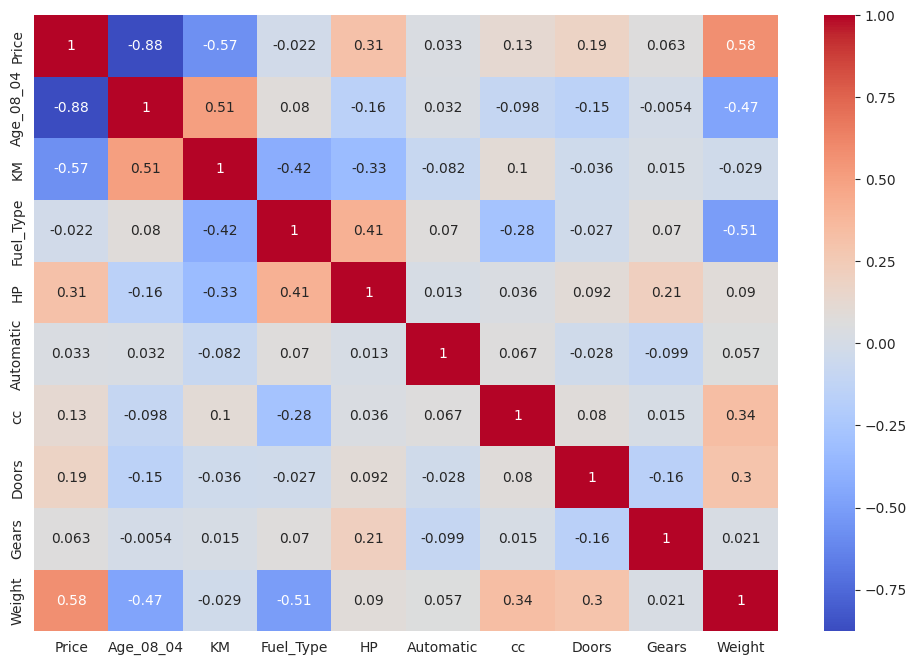

In [95]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


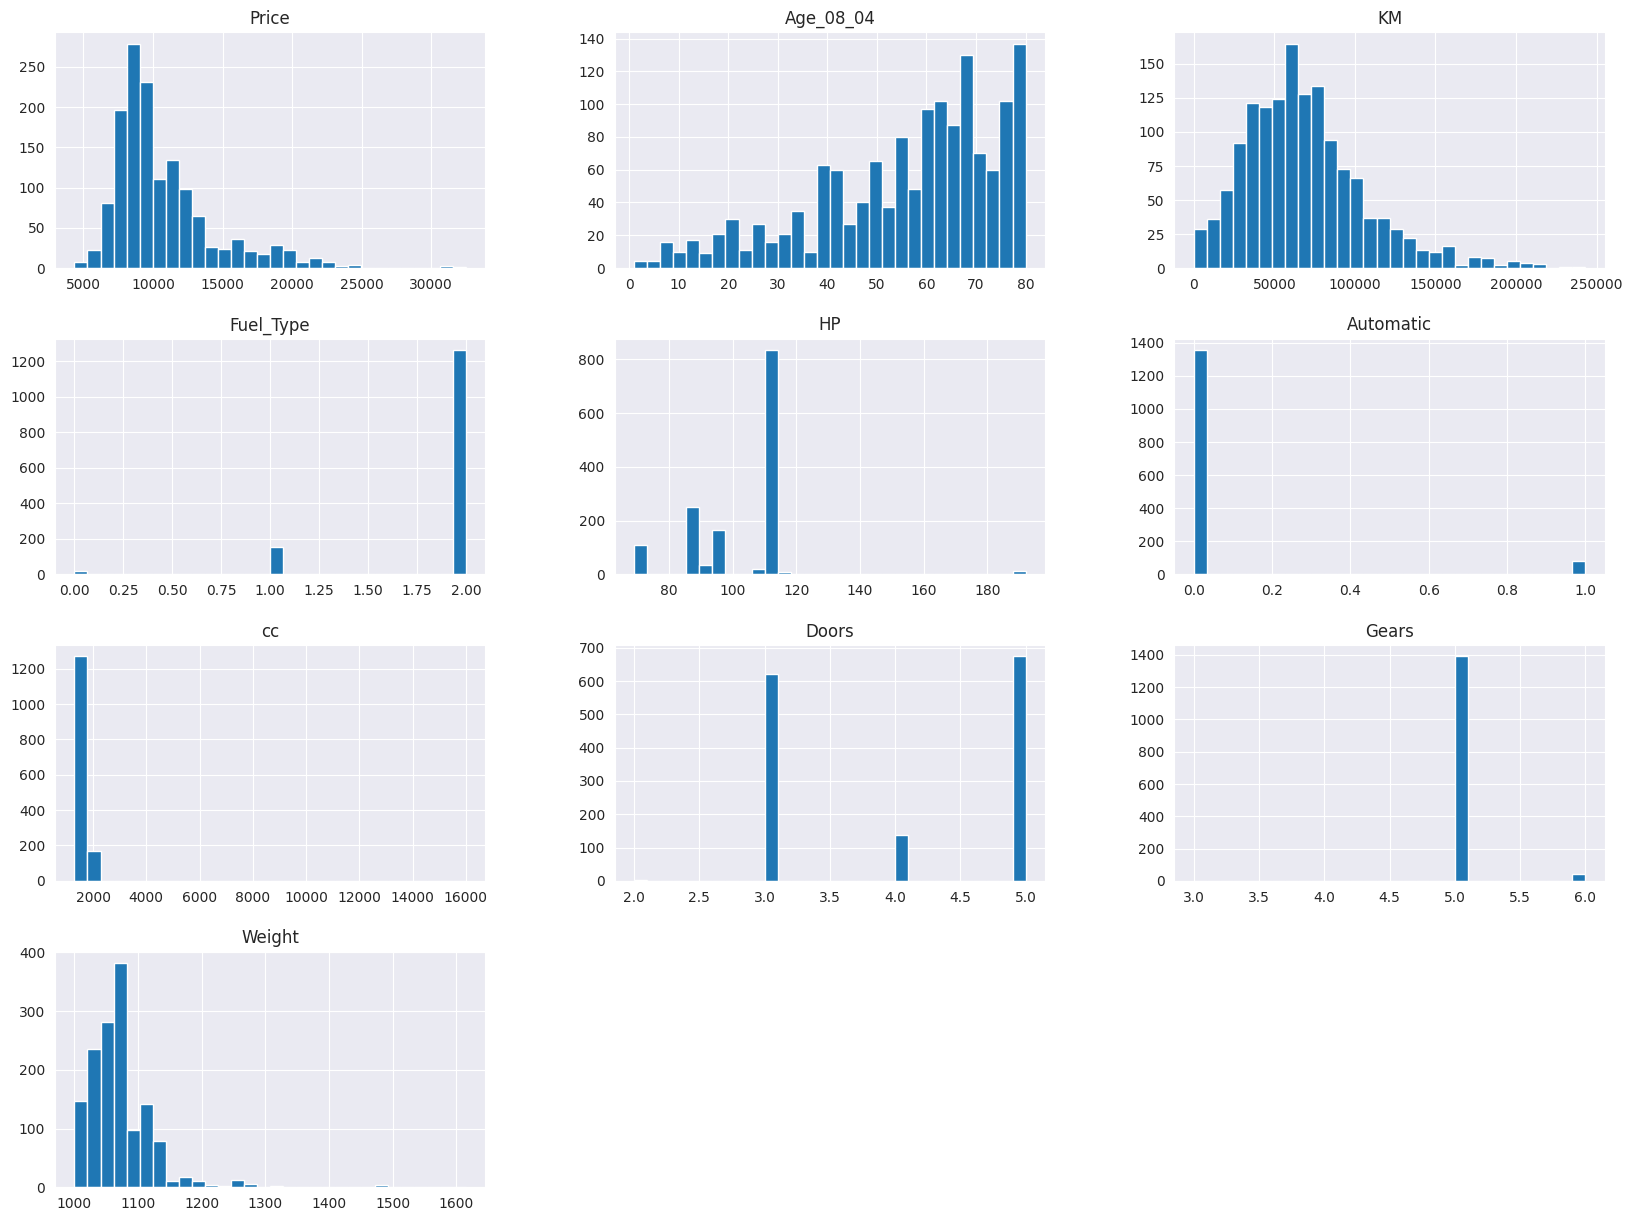

In [96]:
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()

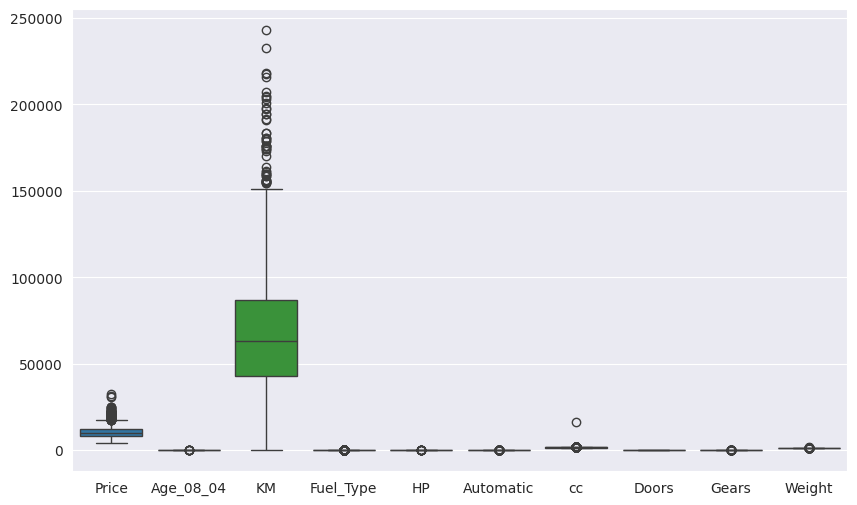

In [97]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

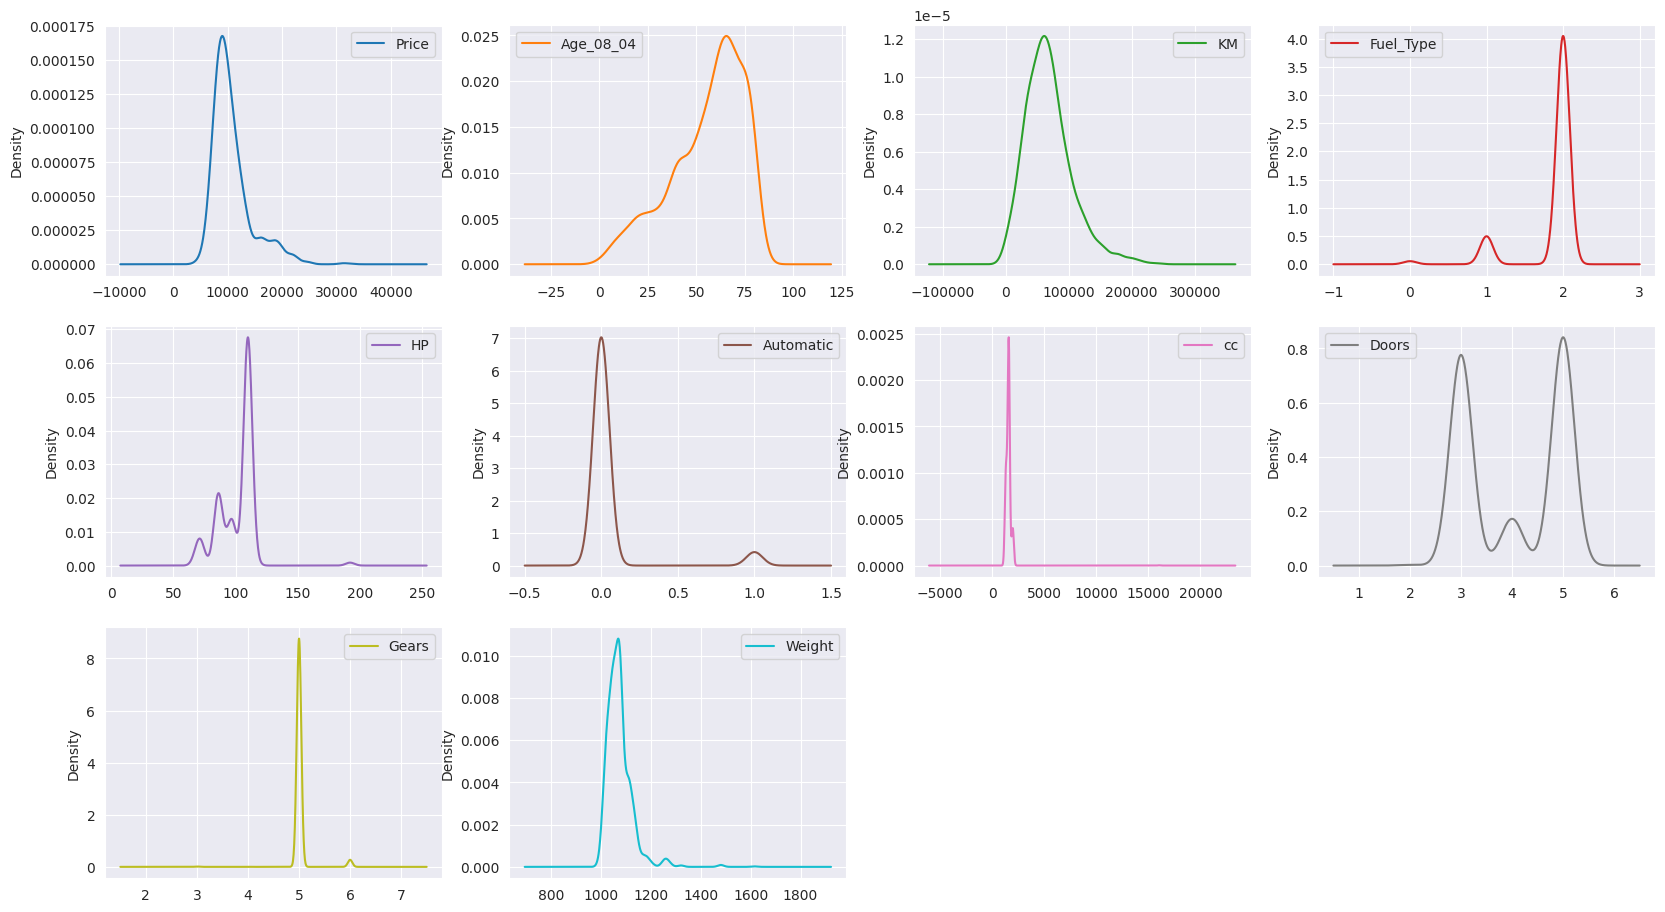

In [98]:
# Density plots
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(20, 15))
plt.show()

In [99]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


#**2.Split the dataset into training and testing sets**
* (e.g., 80% training, 20% testing).


In [100]:
X = data.drop('Price', axis = 1).values
y = data.iloc[:, 0].values.reshape(-1,1)

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [102]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

Shape of X_train:  (1148, 9)
Shape of X_test:  (288, 9)
Shape of y_train:  (1148, 1)
shape of y_test:  (288, 1)


#**Regression Models**

## 1. Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =9)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8336639424700711
R2_score (train):  0.8695032279244472
R2_score (test):  0.8428476112018
RMSE:  1448.050807125809


##2. Decision Tree Regression

In [105]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [106]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8276492924993342
R2_score (train):  1.0
R2_score (test):  0.8627014184142151
RMSE:  1353.4939906179447


##3. Polynomial Regression - 2nd degree

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [108]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.8328645929740333
R2_score (train):  0.9156941682291051
R2_score (test):  0.7864904208269405
RMSE:  1687.842774376144


# **performance of the model using appropriate evaluation metrics on the testing dataset.**

In [109]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean())
         ]

In [110]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1448.050807,0.869503,0.842848,0.833664
1,Polynomial Regression (2nd),1687.842774,0.915694,0.786490,0.832865
2,Decision Tree Regression,1353.493991,1.000000,0.862701,0.827649


#**Lasso and Ridge methods on the model**

##1. Lasso Regression

In [111]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Lasso regression model
lasso = Lasso()

# The hyperparameter grid for alpha
alpha_values = np.logspace(-4, 4, 20)
param_grid = {'alpha': alpha_values}

# Use GridSearchCV to find the best alpha
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha and corresponding RMSE and R2 score
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")

# Evaluate the best model on the test set
y_pred_lasso_test = lasso_cv.predict(X_test)
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

y_pred_lasso_train = lasso_cv.predict(X_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(f"RMSE: {rmse_lasso}")
print(f"R2_score (test): {r2_lasso_test}")
print(f"R2_score (train): {r2_lasso_train}")

# Print the cross-validation results
cv_lasso = cross_val_score(estimator = lasso_cv.best_estimator_, X = X_train, y = y_train.ravel(), cv = 10)
print("CV:", cv_lasso.mean())

Best alpha: 3792.690190732246
RMSE: 1491.3393098258173
R2_score (test): 0.8333112392705226
R2_score (train): 0.8536538053746736
CV: 0.8330734671315498


## 2. Ridge Regression

In [112]:
from sklearn.linear_model import Ridge
# Ridge regression model
ridge = Ridge()

# Hyperparameter grid for alpha
alpha_values = np.logspace(-4, 4, 20)
param_grid = {'alpha': alpha_values}

# Use GridSearchCV to find the best alpha
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
ridge_cv.fit(X_train, y_train)

# Best alpha and corresponding RMSE and R2 score
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")

# Best model on the test set
y_pred_ridge_test = ridge_cv.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_cv.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# cross-validation results
cv_ridge = cross_val_score(estimator = ridge_cv.best_estimator_, X = X_train, y = y_train.ravel(), cv = 10)
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

Best alpha: 0.0001
CV:  0.8328645699825593
R2_score (train):  0.8695032279244361
R2_score (test):  0.8428476229406785
RMSE:  6990.000582459925


 #  **Measuring the Error**

In [113]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Lasso Regression', rmse_lasso, r2_lasso_train, r2_lasso_test, cv_lasso.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean())
         ]


In [115]:
predict_all = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict_all

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1448.050807,0.869503,0.842848,0.833664
1,Polynomial Regression (2nd),1687.842774,0.915694,0.786490,0.832865
2,Decision Tree Regression,1353.493991,1.000000,0.862701,0.827649
3,Lasso Regression,1491.339310,0.853654,0.833311,0.833073
4,Ridge Regression,6990.000582,0.869503,0.842848,0.832865


## Visualize Model perfomance

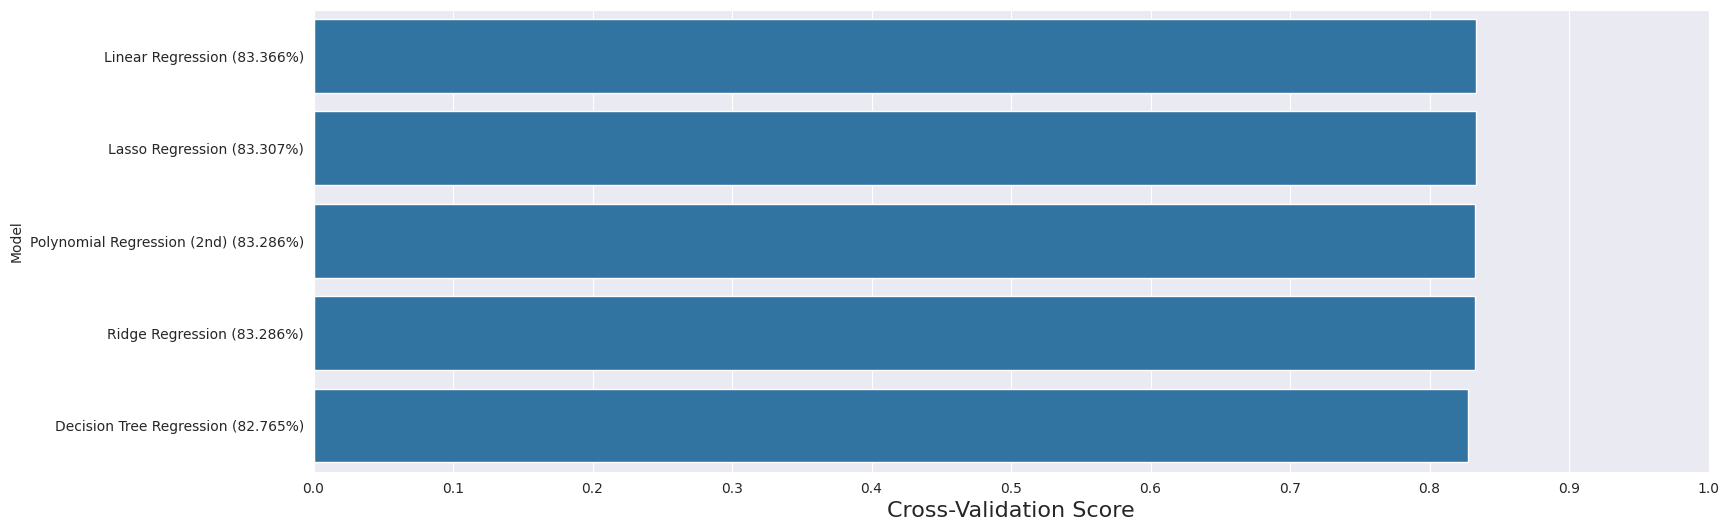

In [116]:
f, axe = plt.subplots(1, 1, figsize=(18, 6))
predict_all.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

# Calculate percentages and create labels with rounded percentages
predict_all['Percentage'] = (predict_all['Cross-Validation'] * 100).round(3)
predict_all['Label'] = predict_all['Model'] + ' (' + predict_all['Percentage'].astype(str) + '%)'

sns.barplot(x='Cross-Validation', y='Label', data=predict_all, ax=axe)

axe.set_xlabel('Cross-Validation Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0, 1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()
